Prepare the Data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# One-hot encode labels [0, 1, 0 , 0, 0 ...., 0]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


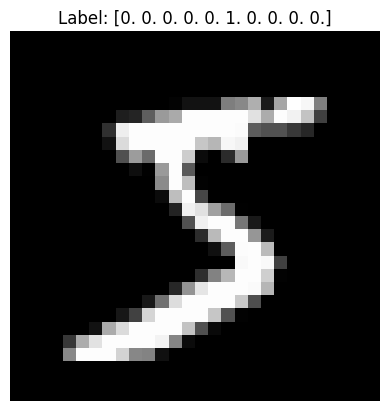

In [2]:
import matplotlib.pyplot as plt

# Choose a sample index to visualize
sample_index = 0

# Reshape the sample to its original shape (28x28) for visualization
sample_image = X_train[sample_index].reshape(28, 28)

# Visualize the sample
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {y_train[sample_index]}')
plt.axis('off')
plt.show()


Model Neural Network

In [4]:
import numpy as np

class Model:
  def __init__(self, input_size, hidden_size, output_size):
    self.W1, self.W2 = self.initialize_weights(input_size, hidden_size, output_size)

  def sigmoid(self, x):
    # Activation function
    return 1/(1+np.exp(-x))

  def sigmoid_derivative(self, x):
    # Derivative of the sigmoid function
    return x * (1 - x)

  def initialize_weights(self, input_size, hidden_size, output_size):
    # Initialize weights randomly with a mean of 0
    W1 = np.random.randn(input_size, hidden_size)
    W2 = np.random.randn(hidden_size, output_size)
    return W1, W2

  def forward_propagate(self, X):
    # Feed forward input X through a network
    H = self.sigmoid(np.dot(X, self.W1))
    Y = self.sigmoid(np.dot(H, self.W2))
    return H, Y


  def back_propagate(self, X, H, Y, y_true):
    # Back propagate errors and update weights
    m = X.shape[0]
    error = Y - y_true
    dW2 = (1/m) * np.dot(H.T, error)
    dH = np.dot(error, self.W2.T) * self.sigmoid_derivative(H)
    dW1 = (1/m) * np.dot(X.T, dH)
    return dW1, dW2

  def update_weights(self, dW1, dW2, learning_rate):
    # Update weights using gradient descent
    self.W1 -= learning_rate * dW1
    self.W2 -= learning_rate * dW2

  def cross_entropy_loss(self, Y_pred, Y_true):
    # Calculate cross-entropy loss
    m = Y_true.shape[0]
    loss = -1/m * np.sum(Y_true * np.log(Y_pred) + (1 - Y_true) * np.log(1 - Y_pred))
    return loss

  def optimize(self, X, y_true, num_epochs, learning_rate, batch_size):
    for epoch in range(num_epochs):
      # Shuffle data
      shuffled_indices = np.random.permutation(X.shape[0])
      X = X[shuffled_indices]
      y_true = y_true[shuffled_indices]

      # Split data into mini-batches
      num_batches = X.shape[0] // batch_size
      for batch_index in range(num_batches):
        start_index = batch_index * batch_size
        end_index = start_index + batch_size
        X_batch = X[start_index:end_index]
        y_batch = y_true[start_index:end_index]

        # Feed forward
        H, Y = self.forward_propagate(X_batch)

        predictions = np.argmax(Y, axis=1)
        loss = self.cross_entropy_loss(Y, y_batch)
        accuracy = np.mean(predictions == np.argmax(y_batch, axis=1))

        # Back propagate
        dW1, dW2 = self.back_propagate(X_batch, H, Y, y_batch)

        # Update weights
        self.update_weights(dW1, dW2, learning_rate)
      print('Epoch: {} - Loss: {} - Accuracy: {}'.format(epoch, loss, accuracy))
    return

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create model
model = Model(input_size=784, hidden_size=64, output_size=10)

# Train model
model.optimize(X_train, y_train, num_epochs=10, learning_rate=0.01, batch_size=64)

# Evaluate model
H, Y = model.forward_propagate(X_test)
predictions = np.argmax(Y, axis=1)
accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
print(f'Accuracy: {accuracy:.4f}')



Epoch: 0 - Loss: 3.126018881348174 - Accuracy: 0.390625
Epoch: 1 - Loss: 2.8493443889125523 - Accuracy: 0.46875
Epoch: 2 - Loss: 2.3907730130299605 - Accuracy: 0.53125
Epoch: 3 - Loss: 2.3251020704417407 - Accuracy: 0.609375
Epoch: 4 - Loss: 2.0707671469172695 - Accuracy: 0.625
Epoch: 5 - Loss: 1.8563609635214382 - Accuracy: 0.640625
Epoch: 6 - Loss: 1.4789621505176815 - Accuracy: 0.765625
Epoch: 7 - Loss: 1.5746088567762269 - Accuracy: 0.734375
Epoch: 8 - Loss: 1.7251777741421004 - Accuracy: 0.71875
Epoch: 9 - Loss: 1.3028380364557777 - Accuracy: 0.765625
Accuracy: 0.7766
